## Show liquor shop on map

In [59]:
!pip install pandas
!pip install folium

import json
import fetch

weather = fetch.fetch_all_data("http://127.0.0.1:9090", '/weather/data')

An error occurred: HTTPConnectionPool(host='127.0.0.1', port=9090): Max retries exceeded with url: /weather/data (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x2c30929d0>: Failed to establish a new connection: [Errno 61] Connection refused'))


In [3]:
liquor_venues = fetch.fetch_all_data("http://127.0.0.1:9090", '/liquor/data')

5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
No more results found


In [4]:
mastodon = fetch.fetch_all_data("http://127.0.0.1:9090", '/mastodon/data')

5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
No more results found


In [5]:
accidents = fetch.fetch_all_data("http://127.0.0.1:9090", '/accidents/data')

5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
No more results found


In [6]:
sensors = fetch.fetch_all_data("http://127.0.0.1:9090", '/sensors/data')

5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 records get.
5000 recor

In [22]:

print(weather[0])

def extract_info(data):
    extracted_info = []
    for item in data:
        extracted_info.append(item["_source"])
    
    return extracted_info



{'_id': 'atmos41-32fc_2020-06-02T10:35:12+10:00', '_index': 'weather_station', '_score': 1.0, '_source': {'Location': {'lat': -37.8022141, 'lon': 144.9656262}, 'RTC': 5382, 'Sensor_Name': 'Weather Station', 'airTemp': 12.0, 'atmosphericPressure': 101.39, 'battery': 4.206, 'command': 0, 'date_measure': '2020-06-02T10:35:12+10:00', 'dev_id': 'atmos41-32fc', 'gustSpeed': 4.88, 'precipitation': 0.0, 'relativeHumidity': 76, 'solar': 261.0, 'solarPanel': 21.766, 'strikes': 0, 'vapourPressure': 1.06, 'windDirection': 263.2, 'windSpeed': 1.27}}


In [25]:
extracted_liquor_venues = extract_info(liquor_venues)
extracted_accidents = extract_info(accidents)
extracted_weather = extract_info(weather)
extracted_mastodon = extract_info(mastodon)
extracted_sensors = extract_info(sensors)

In [26]:
print(extracted_liquor_venues[0])

{'lat': -37.821095, 'lga': 'WHITEHORSE CITY', 'licence_category': 'Restaurant and cafe Licence', 'long': 145.176825, 'objectid': 4, 'premises_name': 'MIPUNG'}


In [32]:
import folium
import pandas as pd
# processed_venues_data = []

# venues with licence type of general, on-premises, packaged
licence_type = "On-Premises Licence"

liquor_venues_df = pd.DataFrame(extracted_liquor_venues)
liquor_venues_df = pd.DataFrame(liquor_venues_df[liquor_venues_df["lga"] != 'MELBOURNE'])
liquor_venues_df = pd.DataFrame(liquor_venues_df[liquor_venues_df["licence_category"] == licence_type])

m = folium.Map(location=[liquor_venues_df['lat'].mean(), liquor_venues_df['long'].mean()], zoom_start=12)

for index, row in liquor_venues_df.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=row['premises_name'],
        icon=folium.Icon(icon='info-sign')
    ).add_to(m)



In [33]:
print(extracted_accidents[0])


{'accident_date': '2015-07-01', 'accident_type': 'Collision with a fixed object', 'alcoholtime': 'Yes', 'day_of_week': 'Wednesday', 'latitude': -38.17736877, 'lga_name': 'GEELONG', 'light_condition': 'Dark Street lights on', 'longitude': 144.3684268, 'objectid': 1, 'speed_zone': '60 km/hr'}


## Visualise the car crashes

In [34]:
from folium.plugins import HeatMap

accidents_df = pd.DataFrame(extracted_accidents)
# exclude the crashes happened in city
accidents_df = accidents_df[accidents_df['lga_name'] != 'MELBOURNE']

# filter the crashes happened in alcohol time
accidents_df = accidents_df[accidents_df['alcoholtime'] == 'Yes']


locations = accidents_df[['latitude', 'longitude']]

# Drop any rows with missing values in these columns
locations = locations.dropna()

# Convert to a list of lists
location_data = locations.values.tolist()

# Add the heat map layer
HeatMap(location_data).add_to(m)


m

In [52]:
weather_df = pd.DataFrame(extracted_weather)

# Split data by date
weather_df['date'] = weather_df['date_measure'].str.split('T').str[0]

#  Group and aggregate by date
aggregated_data = weather_df.groupby('date').agg({
    'RTC': 'first',  
    'battery': 'mean',
    'solarPanel': 'mean',
    'precipitation': 'sum',
    'strikes': 'sum',
    'windSpeed': 'mean',
    'windDirection': 'mean',
    'gustSpeed': 'max',
    'vapourPressure': 'mean',
    'atmosphericPressure': 'mean',
    'relativeHumidity': 'mean',
    'airTemp': 'max',
    'Location': 'first',
    'Sensor_Name': 'first'
}).reset_index()


# filter 2024 weather data
aggregated_data['date'] = pd.to_datetime(aggregated_data['date'])
weather_2024 = aggregated_data[aggregated_data['date'].dt.year == 2024]

print(weather_2024)


           date         RTC   battery  solarPanel  precipitation  strikes  \
1142 2024-01-01  70028784.0  4.177340   12.275787            0.0      0.0   
1143 2024-01-02  70111880.0  4.176824   11.000022            0.0     18.0   
1144 2024-01-03  70212824.0  4.177828   12.013280            0.0      0.0   
1145 2024-01-04  70279470.0  4.175713   12.311649            0.0      0.0   
1146 2024-01-05  70391085.0  4.187046   11.841000            0.0      0.0   
...         ...         ...       ...         ...            ...      ...   
1275 2024-05-15  81709561.0  4.180011    9.451926            0.0      0.0   
1276 2024-05-16  81773580.0  4.181165    9.933890            0.0      0.0   
1277 2024-05-17  81927140.0  4.175667    8.709867            0.0      0.0   
1278 2024-05-18  81947955.0  4.181312    9.988376            0.0      0.0   
1279 2024-05-19  82047834.0  4.174720    9.444147            0.0      0.0   

      windSpeed  windDirection  gustSpeed  vapourPressure  \
1142   1.12734

In [53]:
# join  
weather_pedestrian_2024 = pd.merge(pedestrian_2024, weather_2024, on='date')



In [54]:
# classify function
def classify_weather(row):
    if row['relativeHumidity'] > 80 and row['solarPanel'] < 13:
        return 'Rainy'
    elif row['relativeHumidity'] < 80 and row['solarPanel'] > 13:
        return 'Sunny'
    else:
        return 'Cloudy'

# apply
weather_pedestrian_2024['WeatherType'] = weather_pedestrian_2024.apply(classify_weather, axis=1)

# count for different type of weather
weather_counts = weather_pedestrian_2024['WeatherType'].value_counts()
print(weather_counts)

WeatherType
Cloudy    64
Rainy      9
Sunny      6
Name: count, dtype: int64


In [55]:
mastodon_df = pd.DataFrame(extracted_mastodon)


mastodon_df['date'] = mastodon_df['created_at'].str.split('T').str[0]
mastodon_df['date'] = pd.to_datetime(mastodon_df['date'])


# calculate mean of sentiment for each day
mastodon_df_grouped = mastodon_df.groupby('date').agg({'sentiment': 'mean'}).reset_index()

weather_mastodon_df = pd.merge(weather_2024, mastodon_df_grouped, on='date', how='inner')
weather_mastodon_df['WeatherType'] = weather_mastodon_df.apply(classify_weather, axis=1)



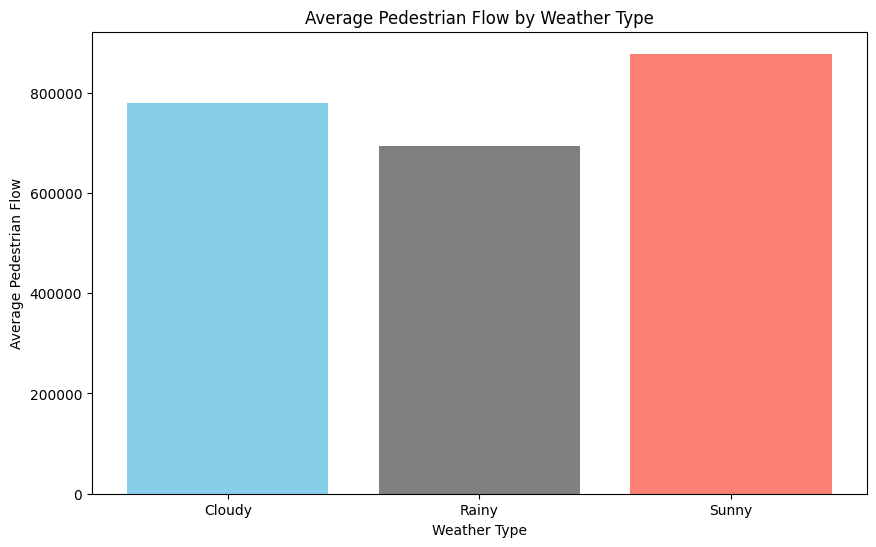

In [56]:
# pedestrian vs. weather type
weather_pedestrian = weather_pedestrian_2024.groupby('WeatherType')['Total_of_Directions'].mean().reset_index()

plt.figure(figsize=(10, 6))

# bar chart
plt.bar(weather_pedestrian['WeatherType'], weather_pedestrian['Total_of_Directions'], color=['skyblue', 'grey', 'salmon'])

# label
plt.xlabel('Weather Type')
plt.ylabel('Average Pedestrian Flow')
plt.title('Average Pedestrian Flow by Weather Type')

plt.show()

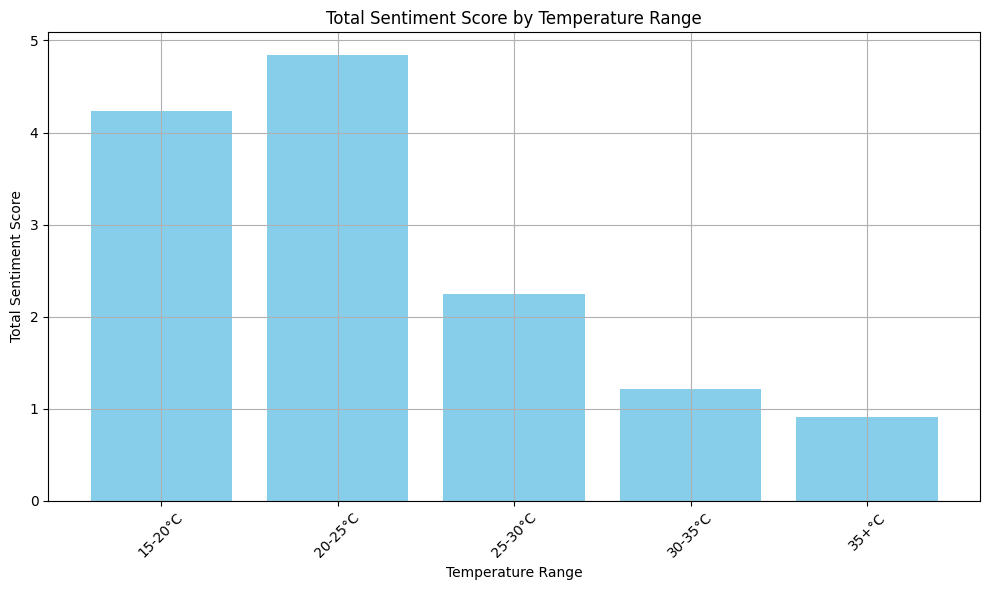

In [57]:
# Define temperature bins and labels
temperature_bins = [15, 20, 25, 30, 35, float('inf')]
temperature_labels = ['15-20°C', '20-25°C', '25-30°C', '30-35°C', '35+°C']

# Use pandas' cut function to categorize the temperature data into corresponding bins
weather_mastodon_df['TemperatureRange'] = pd.cut(weather_mastodon_df['airTemp'], bins=temperature_bins, labels=temperature_labels)

# Step 2: Calculate the total sentiment score for each temperature range
temperature_sentiment_flow = weather_mastodon_df.groupby('TemperatureRange')['sentiment'].sum().reset_index()

# Step 3: Visualize the average sentiment score by temperature range using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(temperature_sentiment_flow['TemperatureRange'], temperature_sentiment_flow['sentiment'], color='skyblue')
plt.xlabel('Temperature Range')
plt.ylabel('Total Sentiment Score')
plt.title('Total Sentiment Score by Temperature Range')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()


        month  sentiment
0  2023-05-01   0.095715
1  2023-06-01   0.097285
2  2023-07-01   0.102451
3  2023-08-01   0.100368
4  2023-09-01   0.101871
5  2023-10-01   0.100254
6  2023-11-01   0.095011
7  2023-12-01   0.102262
8  2024-01-01   0.101948
9  2024-02-01   0.103544
10 2024-03-01   0.106951
11 2024-04-01   0.103400
12 2024-05-01   0.103255


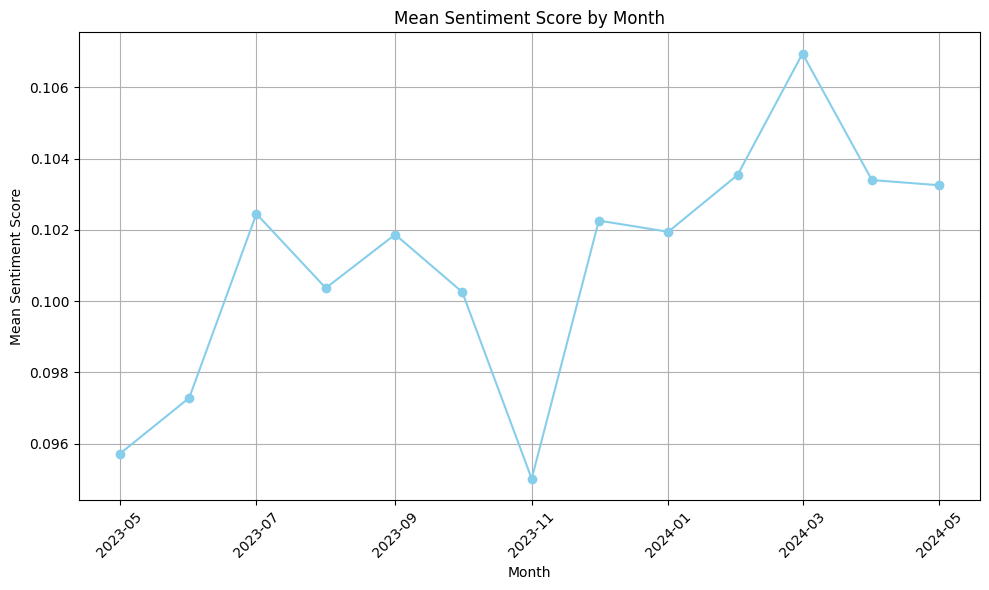

In [62]:
# Extract the month from the datetime column
mastodon_df['month'] = mastodon_df['date'].dt.to_period('M')

# Group by month and calculate the mean sentiment score
monthly_sentiment_mean = mastodon_df.groupby('month')['sentiment'].mean().reset_index()

# Convert the month column to datetime objects for subsequent processing
monthly_sentiment_mean['month'] = monthly_sentiment_mean['month'].dt.to_timestamp()

# Print the summary results
print(monthly_sentiment_mean)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(monthly_sentiment_mean['month'], monthly_sentiment_mean['sentiment'], marker='o', color='skyblue', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Mean Sentiment Score')
plt.title('Mean Sentiment Score by Month')
plt.xticks(rotation=45)
plt.grid(True)  # Add grid lines
plt.tight_layout()  # Automatically adjust layout to prevent text overlap
plt.show()